In [17]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 用于估计统计模型的库 (部分版本会报出警告信息)
import statsmodels.formula.api as smf
import statsmodels.api as sm

from pathlib import Path
#设置数据文件夹路径
DATA = Path().resolve()  / 'data'

# 设置浮点数打印精度
%precision 3

# 在 Jupyter Notebook 里显示图形
%matplotlib inline

# 广义线性模型的组成
广义线性模型可用于非正态分布，所以参数估计使用最大似然法。关于似然函数的形式，我们将在介绍相关模型时详细介绍。

广义线性模型由以下 3 个要素组成：
- 总体服从的概率分布；
- 线性预测算子；
- 联系函数。

我们可以结合数据让这些组成要素灵活变化，这个优点使得广义线性模型适用于多种数据。

下面来介绍一下这些组成要素的含义以及模型选择的步骤。

广义线性模型可用于正态分布、二项分布和泊松分布等多种概率分布。

## 线性预测算子

线性预测算子是线性关系式表示的解释变量。设解释变量为气温，响应变量为啤酒销售额，则根据解释变量预测响应变量的数学式如下：

$$\beta_0 + \beta_1 \times \text{气温}$$

## 联系函数

联系函数用于将响应变量和线性预测算子关联在一起，可以应用于响应变量。下面考察啤酒的销量。一种比较简单的形式是：

$$\text{啤酒销量} = \beta_0 + \beta_1 \times \text{气温}$$

式子的值是有可能小于 0 的，但销量不应该小于 0。在解决这个问题时，就要用到联系函数。

当以个数等计数型变量为对象时，联系函数多采用对数。现将联系函数应用于响应变量：

$$ln \text{啤酒销量} = \beta_0 + \beta_1 \times \text{气温}$$

两边取指数，得到：

$$\text{啤酒销量} = exp\left[\beta_0 + \beta_1 \times \text{气温}\right]$$

指数函数的函数值不可能小于 0，所以通过式子得到的预测结果也不可能小于 0。

对响应变量应用了联系函数后，就可以预测计数型数据、范围为 $\left[0, 1\right]$ 的成功概率等类型的对象了。

## 联系函数与概率分布的关系

概率分布与联系函数的常用组合如下：

| 概率分布 | 联系函数 | 模型         |
| ------- | ------- | ----------- |
| 正态分布 | 恒等函数 | 正态线性模型 |
| 二项分布 | log 函数 | 逻辑回归     |
| 泊松分布 | 对数函数 | 柏松回归     |



# [逻辑回归](https://www.pythonfordatascience.org/logistic-regression-python/)

代码参考《用Python动手学统计学》

概率分布为二项分布、联系函数为 logit 函数的广义线性模型叫作 logistic 回归。解释变量可以有多个，连续型和分类型的解释变量也可以同时存在。

分析学习时间与考试合格情况的关系。构造不同学习时间的考试合格情况的数学模型，其线性预测算子如下：

$$\beta_0 + \beta_1 \times \text{学习时间}$$

响应变量为二值变量，合格为 1，不合格为 0。此时，使用下面的数学式预测显然是不正确的：

$$\text{考试合格情况}:\left(0, 1\right) = \beta_0 + \beta_1 \times \text{学习时间}$$

logit 函数的数学式如下，对数的底为 e：

$$f(x) = ln(\frac{x}{1-x})$$

logistic 函数（逻辑函数）是 logit 函数的反函数。

$$g(y) = \frac{1}{1+exp(-y)}$$

logistic 函数的值永远大于 0 且小于 1。

- $y \rightarrow +\infty$ 时，$g(y) \rightarrow 1$
- $y \rightarrow -\infty$ 时，$g(y) \rightarrow 0$

logistic 回归的概率分布为二项分布，联系函数为 logit 函数。设成功概率（本例为考试合格率）为 $p$，联系函数为 logit 函数，则考试合格率与学习时间的关系如下：

$$ln(\frac{p}{1-p}) = \beta_0 + \beta_1 \times \text{学习时间}$$

将两边转化为 logistic 函数，得到：

$$p = \frac{1}{1+exp\left[-(\beta_0 + \beta_1 \times \text{学习时间})\right]}$$

这就是用于预测合格率的数学式。

## 实例

假设我们得到了一份相关数据，需要分析学习时间是否影响考试合格率。

有 10 个人的学习时间各为 5 小时，则合格人数 $M$ 应当服从成功概率为用于预测合格率的数学式、试验次数为 10 的二项分布。

合格人数：

$$M \sim Bin\left\{m \mid 10, \frac{1}{1+\exp \left[-\left(\beta_{0}+\beta_{1} \times 5\right)\right]}\right\}$$

二项分布的概率质量函数如下

$$Bin (m \mid N, p)={ }_{N} \mathrm{C}_{N}^{m} \cdot p^{m} \cdot(1-p)^{N-m}$$

logistic 回归的样本服从上式所示的概率分布。

广义线性模型使用最大似然法进行参数估计。

### 似然是什么？

当参数为某值时抽到特定样本的概率（密度）叫作似然。似然的英文是 Likelihood，常用首字母 $\mathcal{L}$ 表示。

以投掷两次硬币的结果作为样本，其中第一次为正面，第二次为反面。

- 假设投出正面的概率为 1/2，则 1/2 为参数，上述样本的概率，即似然，就是 1/2× 1/2 = 1/4。
- 假设投出正面的概率为 1/3，则 1/3 为参数，上述样本的概率，即似然，就是 1/3× 2/3 = 2/9。

设数据如下：
- 9 人的学习时间各为 3 小时，其中 4 人考试合格；
- 8 人的学习时间各为 5 小时，其中 6 人考试合格；
- 1 人的学习时间为 8 小时，此人考试合格。

$$\begin{aligned}
\mathcal{L}\left(\beta_{0}, \beta_{1} ; N, m\right)&= \operatorname{Bin}\left\{4 \mid 9, \frac{1}{1+\exp \left[-\left(\beta_{0}+\beta_{1} \times 3\right)\right]}\right\} \\
& \times \operatorname{Bin}\left\{6 \mid 8, \frac{1}{1+\exp \left[-\left(\beta_{0}+\beta_{1} \times 5\right)\right]}\right\} \\
& \times \operatorname{Bin}\left\{1 \mid 1, \frac{1}{1+\exp \left[-\left(\beta_{0}+\beta_{1} \times 8\right)\right]}\right\}
\end{aligned}$$

以横轴为学习时间（hours）、纵轴为合格率（result），绘制出学习时间与合格率关系的条形图。

在条形图中，纵轴的值为均值。合格为 1，不合格为 0，因此均值可看作合格率

<AxesSubplot:xlabel='hours', ylabel='result'>

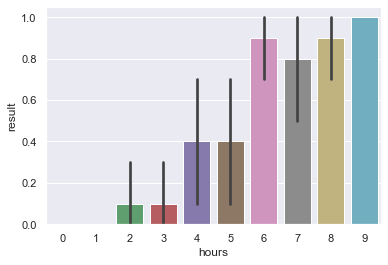

In [19]:
# 读取数据
test_result = pd.read_csv(DATA/"logistic-regression.csv")
# 可视化
sns.barplot(x = "hours", y = "result", data = test_result)

In [12]:
# 学习时间与合格率的关系
test_result.groupby("hours").mean()

,result
hours,
0,0.00000
1,0.00000
2,0.10000
3,0.10000
4,0.40000
5,0.40000
6,0.90000
7,0.80000
8,0.90000


学习时间不大于 1 小时的人全部不合格，学习时间为 9 小时的人全部合格。

## 实现 logistic 回归

In [22]:
# 建模
mod_glm = smf.glm(formula = "result ~ hours", data = test_result, family=sm.families.Binomial()).fit()

在估计广义线性模型时，不管是不是 logistic 回归模型，都需要使用 smf.glm 函数。下面介绍它的参数。

- 第 1 个参数 formula 与估计正态线性模型时所用的一样。参数值为 "result ~hours"，响应变量为 result，解释变量为 hours。当存在多个解释变量时，使用加号（+）连接。
- 第 2 个参数是对象数据，格式为 pandas 的数据帧。
- 第 3 个参数是概率分布。sm.families.Binomial() 为二项分布，sm.families.Poisson() 为泊松分布。

这里没有指定联系函数。当概率分布为二项分布时，联系函数默认为 logit 函数。不同的概率分布默认的联系函数也不同。泊松分布默认的联系函数为对数函数。

In [21]:
# 打印估计的结果
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Fri, 29 Apr 2022   Deviance:                       68.028
Time:                        20:26:07   Pearson chi2:                     84.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5032
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

有一部分结果与正态线性模型不同，下面补充说明一下。
- Method 中的 IRLS 为迭代加权最小二乘法的英文 Iterative Reweighted LeastSquares 的缩写。
- 算法中的迭代次数为 No.Iterations。
- Deviance 与 Pearson chi2 也是初次出现，它们是表示模型拟合程度的指标，

我们将在之后介绍。Wald 检验取代了 $t$ 检验，但对于系数的解读，则与正态线性模型一致。学习时间的系数为正数。

In [23]:
# 空模型
mod_glm_null = smf.glm("result ~ 1", data = test_result, family=sm.families.Binomial()).fit()

In [24]:
# 对比 AIC
print("空模型　　　：", mod_glm_null.aic.round(3))
print("学习时间模型：", mod_glm.aic.round(3))

空模型　　　： 139.989
学习时间模型： 72.028


包含解释变量的模型的 AIC 更小，说明在预测合格率时需要学习时间这个解释变量。学习时间的系数为正数，说明学习时间越长，合格率越高。

## 回归曲线

以横轴为学习时间、纵轴为合格情况（二值变量）绘制出散点图，并在其上绘制出由 logistic 回归所得的理论合格率。

设置函数 seaborn.lmplot 的参数logistic = True，即可绘制出指定图形

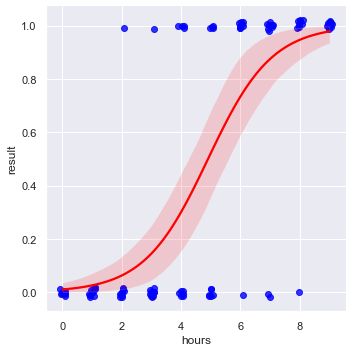

In [25]:
# 用 lmplot 绘制 logistic 回归曲线
sns.lmplot(x = "hours", y = "result",
           data = test_result, 
           logistic = True,
           scatter_kws = {"color": "blue"},
           line_kws    = {"color": "red"},
           x_jitter = 0.1, y_jitter = 0.02)

合格情况的数据全是 0 或 1，在图形上会重合，因而这里指定了 x_jitter 与y_jitter，以让散点图的数据在图形上稍微分散一些。

## 预测成功概率

我们还可以预测合格率的值，方法和正态线性模型类似。

In [26]:
# 0~9 上公差为 1 的等差数列
exp_val = pd.DataFrame({"hours": np.arange(0, 10, 1)})
# 成功概率的预测值
pred = mod_glm.predict(exp_val)
pred

0   0.01037
1   0.02584
2   0.06292
3   0.14529
4   0.30088
5   0.52143
6   0.73393
7   0.87474
8   0.94647
9   0.97815
dtype: float64

不学习的合格率只有 1%，学习 9 小时的合格率为 98%。要得到要么为 0 要么为1 的值，只需对小数点后一位四舍五入，数值只要不小于 0.5 就是合格。

## logistic 回归的系数与优势比的关系

解读 logistic 回归模型中估计的参数，还需要掌握一个术语。成功概率与失败概率的比值叫作优势，它表示是否容易成功，其数学式如下：

$$\text{优势} = \frac{p}{1-p}$$

其中，$p$ 为成功概率。当 $p=0.5$ 时，优势为 1，表示成功和失败的容易度相当；当 $p=0.75$ 时，优势为 3，表示成功比失败容易 3 倍。

优势的对数叫作对数优势，logit 函数也可以看作将成功概率转换为对数优势的函数。优势的比值叫作优势比。优势比的对数叫作对数优势比。

当联系函数为 logit 函数时，logistic 回归的系数与优势密切相关。具体来说，解释变量改变一个单位时的对数优势比就是回归系数。

下面用程序验证一下。分别求学习时间为 1 小时和 2 小时的合格率。

In [27]:
# 学习时间为 1 小时的合格率
exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)

# 学习时间为 2 小时的合格率
exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)

In [ ]:
# 优势
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

# 对数优势比
np.log(odds_2 / odds_1)

In [30]:
# 计算学习时间的系数，可知它恰好是对数优势比。
mod_glm.params["hours"]

0.929

In [31]:
# 当系数为 e 的指数时，其结果就是优势比。
np.exp(mod_glm.params["hours"])

2.532

系数的含义就是解释变量每增加一个单位时优势的变化倍数。

# 广义线性模型的评估

在介绍正态线性模型时，我们提到了在评估模型时必须计算残差。但是，当总体不服从正态分布时，残差的处理方法会有很大的不同。

本节将介绍广义线性模型的残差处理方法。残差是表现数据与模型不契合的程度的重要指标。本节还将介绍如何对待模型造成的损失。

由于逻辑回归属于非参数检验，因此检查假设检验前提的方法和其他参数检验的检查方法不同。

在线性回归中，我们可以通过计算目标函数和观测值距离来计算残差，但是逻辑回归等非线性回归方法不能直接计算距离。

为什么不能直接计算距离呢？因为因变量的取值是定类变量（二值的定类变量就是 0/1），定类变量是不能直接进行计算的。

而且，由于数据不服从正态分布，因此我们不知道数据统计量（如残差）的分布情况，这种时候，我们需要借助其他分析方法：

- 皮尔逊残差
- 学生化皮尔逊残差
- 偏差残差

## 皮尔逊残差

二项分布的皮尔逊残差的计算式如下：

$$Pearsion\ residuals=\frac{y-N \hat{p}}{\sqrt{N \hat{p}(1-\hat{p})}}$$

$y$ 为响应变量（二值随机变量，即考试合格情况），$N$ 为试验次数，$\hat{p}$ 为估计的成功概率（由 `mod_glm.predict()` 得到的预测值）。对于每个预测结果，试验次数都是 1，所以皮尔逊残差如下：

$$Pearsion\ residuals=\frac{y- \hat{p}}{\sqrt{\hat{p}(1-\hat{p})}}$$

皮尔逊残差的分母中的 $N \hat{p}(1-\hat{p})$ 就是二项分布的方差，它的平方根就是二项分布的标准差。

在介绍正态线性模型时，我们把响应变量与通过 predict() 函数求得的预测值的差作为残差，即 $y-\hat{p}$。残差除以分布的标准差，得到的就是皮尔逊残差。

假设 $N$ 不变，那么当 $p=0.5$ 时，二项分布的方差 $N \hat{p}(1-\hat{p})$ 最大。当合格与不合格各占一半时，数据非常分散，此时预测值与实际值之间的差距看起来反而更小（易于接受）。

当 $p=0.9$ 时，预测的结果是基本合格，方差较小，此时预测值与实际值之间的差距看起来反而更大（难以接受）。这就是皮尔逊残差的含义。

In [37]:
# 计算皮尔逊残差

# 预测的成功概率
pred = mod_glm.predict()
# 响应变量 (合格情况)
y = test_result.result

# 皮尔逊残差
peason_resid = (y - pred) / np.sqrt(pred * (1 - pred))
peason_resid.head(3)

0   -0.10235
1   -0.10235
2   -0.10235
Name: result, dtype: float64

In [38]:
# 获取皮尔逊残差
mod_glm.resid_pearson.head(3)

0   -0.10235
1   -0.10235
2   -0.10235
dtype: float64

In [39]:
# 皮尔逊残差的平方和
np.sum(mod_glm.resid_pearson**2)

84.911

In [40]:
# 同样出现在 summary 函数的结果中
mod_glm.pearson_chi2

84.911

## 偏差残差

二项分布的偏差残差的平方和就是模型偏差。公式比较复杂，这里不再介绍，下面用 Python 代为计算。

In [43]:
# 计算偏差残差

# 预测的成功概率
pred = mod_glm.predict()
# 响应变量 (合格情况)
y = test_result.result

# 与完美预测了合格情况时的对数似然度的差值
resid_tmp = 0 - np.log(
    sp.stats.binom.pmf(k = y, n = 1, p = pred))
# 偏差残差
deviance_resid = np.sqrt(
    2 * resid_tmp
) * np.sign(y - pred)
# 打印结果
deviance_resid.head(3)

0   -0.14437
1   -0.14437
2   -0.14437
Name: result, dtype: float64

与完美预测了合格情况时的对数似然的差值就是模型偏差。当成功概率为 100%时，合格的概率为 1；当成功概率为 0% 时，失败的概率为 1。因此，完美预测了合格情况时的对数似然就是 ln(1)，它的值为 0，于是会先计算出 resid_tmp。resid_tmp 的 2 倍的平方根就是偏差残差，它的平方和就是模型偏差。resid_tmp 在定义上为正数，所以 deviance_resid 多了 1 个因数。np.sign函数用于获取参数的正负号，y - pred 大于 0 就返回 1，小于 0 就返回 -1，其余为 0。

我们也可以从模型中直接获取偏差残差。

In [44]:
mod_glm.resid_deviance.head()

0   -0.14437
1   -0.14437
2   -0.14437
3   -0.14437
4   -0.14437
dtype: float64

In [45]:
# deviance
np.sum(mod_glm.resid_deviance ** 2)

68.028

下面的代码[参考](https://www.pythonfordatascience.org/logistic-regression-python/)

In [46]:
#df = pd.read_stata("https://stats.idre.ucla.edu//stat//stata//dae//binary.dta")
df = pd.read_stata(DATA / 'binary.dta')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    float32
 1   gre     400 non-null    float32
 2   gpa     400 non-null    float32
 3   rank    400 non-null    float32
dtypes: float32(4)
memory usage: 9.4 KB


In [47]:
df.head()

,admit,gre,gpa,rank
0,0.00000,380.00000,3.61000,3.00000
1,1.00000,660.00000,3.67000,3.00000
2,1.00000,800.00000,4.00000,1.00000
3,1.00000,640.00000,3.19000,4.00000
4,0.00000,520.00000,2.93000,4.00000


我们可以看到，数据集里面看似一共有四个定量变量，但实际上：

- `admit` 是一个二值的定类变量，只是因为表示方式为 0/1 的原因，所以系统将其识别为定量变量。
- `rank` 也是一个定类变量，只是因为表示方式为 1、2、3、4，所以系统将其识别为定量变量。

现在我们想要研究，`gre` 和 `gpa` 这两个定量变量和 `rank` 定类变量，哪个变量会影响学生被 `admit` 的概率？

下面先让我们看一下，定量变量的描述统计值，以及定类变量和目标变量的描述统计结果：

In [48]:
rp.summary_cont(df[['gre', 'gpa']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,gre,400.00000,587.70000,115.51670,5.77580,576.34520,599.05490
1,gpa,400.00000,3.38990,0.38060,0.01900,3.35250,3.42730


In [49]:
rp.summary_cat(df[['admit', 'rank']])

,Variable,Outcome,Count,Percent
0,admit,0.00000,273,68.25000
1,,1.00000,127,31.75000
2,rank,2.00000,151,37.75000
3,,3.00000,121,30.25000
4,,4.00000,67,16.75000
5,,1.00000,61,15.25000


Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


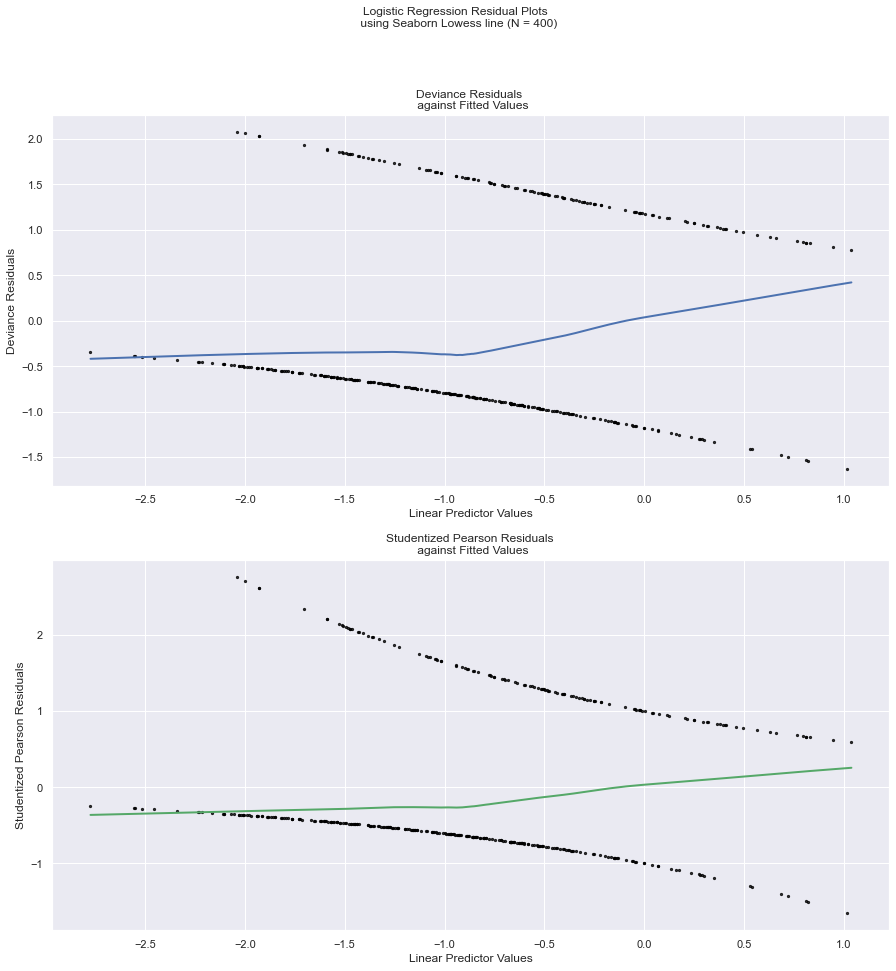

In [50]:
model = smf.logit("admit ~ gre + gpa + C(rank)", data = df).fit()

## Plotting multiple plots same figure
fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 400)")


# Deviance Residuals
sns.regplot(x=model.fittedvalues, y=model.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(x=model.fittedvalues, y=model.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                 0.08292
Time:                        15:20:24   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[T.2.0]    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
C(rank)[T.3.0]    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
C(rank)[T.4.0]    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
gre                0.0023      0.001      2.070      0.038       0.000       0.004
gpa                0.8040      0.332      2.423      0.015       0.154       1.454
==================================================================================
"""

Using this information, one can evaluate the regression model. The current overal model is significant which indicates it's better than using the mean to predict being admitted.Interpreting the coefficients right now would be premature since the model's diagnostics have not been evaluated. However, for demonstration purposes they will be interpreted.

The overall model indicates the model is better than using the mean of admission to predict an applicants admission decision, F(5, 394) < 0.0000. For every unit increase in GRE there is a 0.0023 increase in the log odds of being admitted; additionally, for every unit increase in GPA there is a 0.8040 increase in the log odds of being admitted. Applicants applying from institutions with a rank of 2, 3, or 4 have a decrease in the log odds of being admitted of -0.6754, -1.3402, and -1.5515, respectively, compared to applicants applying from a rank 1 institution.

That the interpretation is valid, but log odds is not intuitive in it's interpretation. Let's convert this to odds ratio and interpret the model again. To convert the log odds coefficients and confidence intervals, one needs to take the exponential of the values.

In [52]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,z-value,2.5%,97.5%
Intercept,0.01850,0.00047,0.00198,0.17278
C(rank)[T.2.0],0.50893,0.03283,0.27369,0.94636
C(rank)[T.3.0],0.26179,0.00010,0.13306,0.51509
C(rank)[T.4.0],0.21194,0.00020,0.09344,0.48069
gre,1.00227,0.03847,1.00012,1.00442
gpa,2.23455,0.01539,1.16612,4.28188


The overall model indicates the model is better than using the mean of admission to predict an applicants admission decision, F(5, 394) < 0.0000. The odds of being admitted increases by a factor of 1.002 for every unit increase in GRE; likewise, the odds of being admitted increases by a factor of 2.235 for every unit increase in GPA. The odds of being addmitted for those applying from an institution with a rank of 2, 3, or 4 are 0.5089, 0.2618, and 0.2119, respectively, times that of those applying from an institution with a rank of 1.

Converting to odd ratios (OR) is much more intuitive in the interpretation. Where,

- OR = 1, same odds
- OR < 1, fewer/decrease in odds
- OR > 1, greater/increase in odds

Also note that ORs are multiplicative in their interpretation that is why the phrasing includes "... times more likely\less likely ..." or "... a factor of ...".